<a href="https://colab.research.google.com/github/Simpleshell3/CMR-Land-Sector-Analysis/blob/main/Far_North_Cameroon_Land_Sector_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing packages
!pip install geopandas 
!pip install matplotlib
!apt install proj-bin libproj-dev libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install mapclassify
!pip install geoplot
!pip install seaborn
!pip install rasterio
!pip install folium
!pip install ipyleaflet


In [2]:
#Importing packages
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl)
from ipywidgets import Text, HTML
from branca.colormap import linear
import geopandas as gpd
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc
import mapclassify
from mpl_toolkits.basemap import Basemap
import numpy as np
import geoplot
import geoplot.crs as gcrs
import geoplot as gplt
import seaborn as sns
import io
import requests
import rasterio
from rasterio.plot import show
import folium

%matplotlib inline

In [3]:
# Downloading and displaying Far North Cameroon's Adminitrative Boundaries
url1 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_Far-North.json"

a=requests.get(url1).content

df_fncbo = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_fncbo

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,CMR,CM-EN,Far-North,Far-North,Extrême-Nord,,administrative,4,Q823976,fr:Région de l'Extrême-Nord (Cameroun),2019-02-26T08:00:07,"POLYGON ((13.41220 10.12152, 13.41499 10.11805..."


In [8]:
m = folium.Map(
    location=[11, 14],
    tiles="cartodbpositron",
    zoom_start=7,
)

folium.GeoJson(url1, name="adminlevel").add_to(m)

folium.LayerControl().add_to(m)
m

In [9]:
# Downloading and displaying Far North Cameroon's Ecological Zones
url2 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_Far-North_GEZ.json"

a=requests.get(url2).content

df_fncgez = gpd.read_file(io.StringIO(a.decode('utf-8')))

df_fncgez

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CMR,CM-EN,Far-North,Tropical dry forest,13,TAwb,4,"POLYGON ((15.06693 11.24292, 15.04135 11.23288..."
1,CMR,CM-EN,Far-North,Tropical mountain system,16,TM,4,"POLYGON ((13.86198 11.11176, 13.86192 11.11168..."
2,CMR,CM-EN,Far-North,Tropical shrubland,14,TBSh,4,"POLYGON ((15.06693 11.24292, 15.06645 11.24952..."
3,CMR,CM-EN,Far-North,Water,90,Water,4,"POLYGON ((14.54743 12.79636, 14.54883 12.80171..."


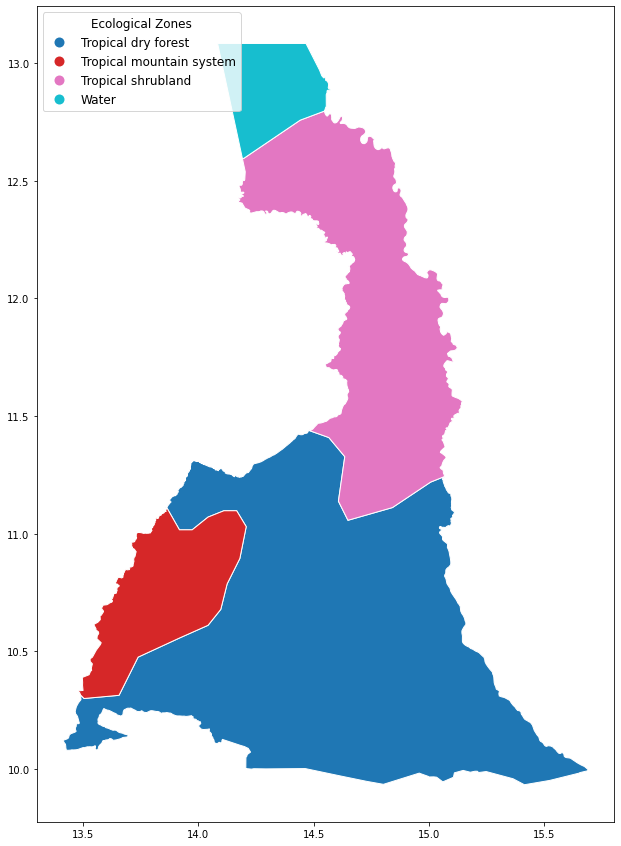

In [10]:
df_fncgez.plot(figsize= (15,15), column='gez_name', edgecolor='white', 
             legend=True, legend_kwds={"loc":"upper left","fontsize": "large", "title":"Ecological Zones", "title_fontsize":"large"})
plt.show()

In [11]:
# Downloading and displaying Far North Cameroon's Soil Resources
url3 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_Far-North_WSR.json"

a=requests.get(url3).content

df_fncwsr = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_fncwsr

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,CMR,CM-EN,Far-North,AR,3,Arenosol,4,"POLYGON ((14.85192 12.54078, 14.85194 12.54232..."
1,CMR,CM-EN,Far-North,GL,7,Gleysol,4,"POLYGON ((14.85192 12.54078, 14.73197 12.55511..."
2,CMR,CM-EN,Far-North,LX,6,Lixisol,4,"POLYGON ((14.33455 10.65256, 14.31497 10.77882..."
3,CMR,CM-EN,Far-North,VR,5,Vertisol,4,"MULTIPOLYGON (((15.29839 9.97631, 15.28598 10...."
4,CMR,CM-EN,Far-North,WAT,99,Waterbodies,4,"POLYGON ((14.56338 12.91484, 14.56215 12.91761..."


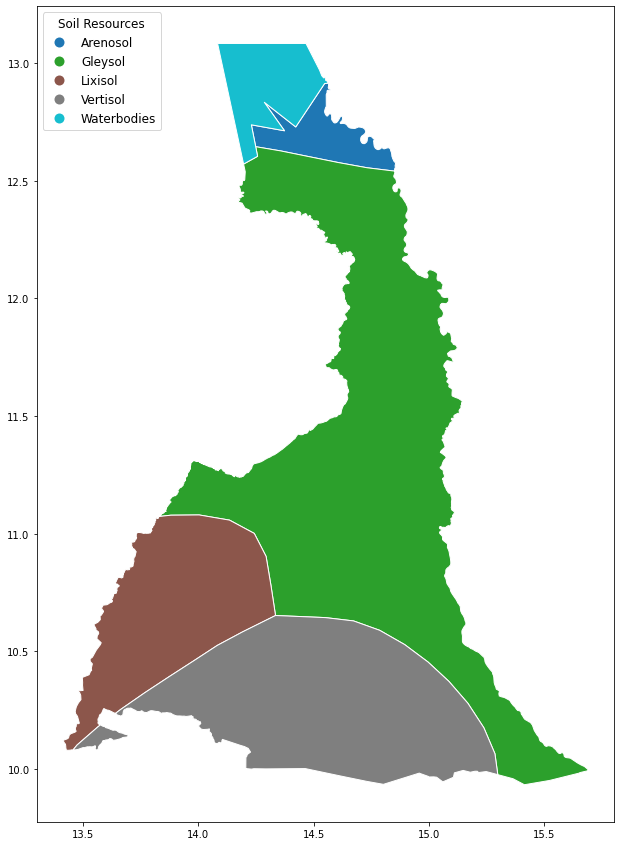

In [12]:
df_fncwsr.plot(figsize= (15,15), column='IPCC', edgecolor='white', 
             legend=True, legend_kwds={"loc":"upper left","fontsize": "large", "title":"Soil Resources", "title_fontsize":"large"})
plt.show()